In [1]:
# Load the dataset
import pandas as pd
df=pd.read_csv("Red_wine_quality.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# Seperate the predictor variables and target variables.
X=df.drop(["quality"],axis=1)
y=df[["quality"]]

In [3]:
# Remove the outliers from the predictor variables
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(X)
outlier_label=pd.DataFrame(clf.predict(X))
outlier_label=outlier_label.rename(columns={0:"outlier_label"})
outlier_label

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


,outlier_label
0,1
1,1
2,1
3,1
4,1
...,...
1594,1
1595,1
1596,1
1597,1


In [4]:
# Concatenate the predictor variables and the outlier column. 
X = pd.concat([X,outlier_label], axis=1, sort=False)
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,outlier_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [5]:
# Select only rows that are not outliers. Non-outliers have label equals to 1. Outliers have label equal to -1.
X=X.loc[X["outlier_label"] == 1]
X=X.drop(["outlier_label"],axis=1)
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


The original dataset has 1599 rows. The dataset with the outlier removed has 1439 rows. So, IsolationForest detected and removed 160 outliers from the predictor variables. Their correspoding target variables needs to be removed as well. 

In [6]:
y = pd.concat([y,outlier_label], axis=1, sort=False)
y=y.loc[y["outlier_label"] == 1]
y=y.drop(["outlier_label"],axis=1)
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


The outliers are removed. Split the dataset into train and test subsets.

In [7]:
# Standardize the data.
from sklearn import preprocessing
names=X.columns
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X, columns=names)
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.572231,1.040743,-1.416701,-0.537896,-0.272732,-0.445926,-0.327227,0.652848,1.433732,-0.614032,-0.995124
1,-0.317375,2.103791,-1.416701,0.189725,0.688327,1.042292,0.796267,0.024114,-0.840873,0.281879,-0.579222
2,-0.317375,1.395092,-1.200996,-0.122113,0.426220,-0.020721,0.353678,0.149861,-0.400627,0.057901,-0.579222
3,1.848904,-1.439704,1.603177,-0.537896,-0.316417,0.191882,0.557950,0.778595,-1.134371,-0.464714,-0.579222
4,-0.572231,1.040743,-1.416701,-0.537896,-0.272732,-0.445926,-0.327227,0.652848,1.433732,-0.614032,-0.995124
...,...,...,...,...,...,...,...,...,...,...,...
1434,-1.336800,0.450160,-0.985290,-0.433950,0.338851,1.786401,0.013225,-1.170481,0.993486,-0.464714,0.148605
1435,-1.527943,0.154869,-0.877438,-0.226059,-0.884315,2.530510,0.251542,-1.032160,1.507106,0.879153,0.876432
1436,-1.273086,-0.081364,-0.715658,-0.122113,-0.272732,1.467497,-0.122956,-0.642345,0.773363,0.804494,0.668482
1437,-1.527943,0.715922,-0.769585,-0.433950,-0.316417,1.786401,0.013225,-0.812103,1.873978,0.505857,-0.163321


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)

### Multi-label neural network

In [9]:
length=X_train.shape[1]
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
num_classes=y_test.shape[1]

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

In [10]:
# Load the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

# define classification model

def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(length, activation='relu', input_shape=(length,)))
    model.add(Dense(550, activation='tanh'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
model=classification_model()
model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=25, verbose=2)
model.evaluate(X_test,y_test,verbose=0)

Train on 1079 samples, validate on 360 samples
Epoch 1/25
 - 1s - loss: 1.4241 - acc: 0.5042 - val_loss: 1.0731 - val_acc: 0.5861
Epoch 2/25
 - 0s - loss: 1.0681 - acc: 0.5589 - val_loss: 0.9706 - val_acc: 0.6139
Epoch 3/25
 - 0s - loss: 1.0014 - acc: 0.5783 - val_loss: 0.9382 - val_acc: 0.6222
Epoch 4/25
 - 0s - loss: 0.9716 - acc: 0.5913 - val_loss: 0.9235 - val_acc: 0.6222
Epoch 5/25
 - 0s - loss: 0.9554 - acc: 0.5950 - val_loss: 0.9079 - val_acc: 0.6278
Epoch 6/25
 - 1s - loss: 0.9421 - acc: 0.5996 - val_loss: 0.8962 - val_acc: 0.6333
Epoch 7/25
 - 1s - loss: 0.9356 - acc: 0.5978 - val_loss: 0.9178 - val_acc: 0.6139
Epoch 8/25
 - 1s - loss: 0.9285 - acc: 0.5978 - val_loss: 0.8942 - val_acc: 0.6167
Epoch 9/25
 - 0s - loss: 0.9210 - acc: 0.5987 - val_loss: 0.8850 - val_acc: 0.6250
Epoch 10/25
 - 0s - loss: 0.9056 - acc: 0.6108 - val_loss: 0.8774 - val_acc: 0.6361
Epoch 11/25
 - 0s - loss: 0.9000 - acc: 0.6117 - val_loss: 0.8719 - val_acc: 0.6417
Epoch 12/25
 - 1s - loss: 0.8958 - acc

[0.8605611761411031, 0.6361111111111111]

Removing the outliers and standardizing improve the model's accuracy by about 4%. The previous model that included all the datapoints had an accuracy of only 58%.

### Multi-label decision tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
WineQuality=DecisionTreeClassifier(criterion="entropy",max_depth=25)
WineQuality

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
WineQuality.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
pred_quality=WineQuality.predict(X_test)
from sklearn import metrics
print("Decision tree's accuracy is: ",metrics.accuracy_score(y_test,pred_quality))

Decision tree's accuracy is:  0.6472222222222223


The previous decision tree model, although being the best among all thre, had only accuracy of 60.75%. Now, it has an accuracy of 65%. A 4.25% improvement.

### Neural network model for regression

In [98]:
# define regression model
num_cols=X.shape[1]
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(num_cols,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation ='relu'))
    model.add(Dense(100,activation='tanh'))
    model.add(Dense(1))
# "50" is the number of nodes in each of the three hidden layers.    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [99]:
# build the model
model = regression_model()

In [100]:
# fit the model
model.fit(X, y, validation_split=0.3, epochs=20, verbose=2)

Train on 1007 samples, validate on 432 samples
Epoch 1/20
 - 1s - loss: 10.3947 - val_loss: 1.3245
Epoch 2/20
 - 1s - loss: 1.1424 - val_loss: 0.9060
Epoch 3/20
 - 0s - loss: 0.6522 - val_loss: 0.6164
Epoch 4/20
 - 1s - loss: 0.4959 - val_loss: 0.5258
Epoch 5/20
 - 0s - loss: 0.4219 - val_loss: 0.4686
Epoch 6/20
 - 0s - loss: 0.3892 - val_loss: 0.4433
Epoch 7/20
 - 1s - loss: 0.3695 - val_loss: 0.4193
Epoch 8/20
 - 0s - loss: 0.3575 - val_loss: 0.4256
Epoch 9/20
 - 1s - loss: 0.3505 - val_loss: 0.4854
Epoch 10/20
 - 1s - loss: 0.3465 - val_loss: 0.4055
Epoch 11/20
 - 1s - loss: 0.3334 - val_loss: 0.3963
Epoch 12/20
 - 1s - loss: 0.3267 - val_loss: 0.3950
Epoch 13/20
 - 0s - loss: 0.3211 - val_loss: 0.4057
Epoch 14/20
 - 1s - loss: 0.3164 - val_loss: 0.4005
Epoch 15/20
 - 1s - loss: 0.3176 - val_loss: 0.4148
Epoch 16/20
 - 1s - loss: 0.3160 - val_loss: 0.3965
Epoch 17/20
 - 1s - loss: 0.2996 - val_loss: 0.4079
Epoch 18/20
 - 1s - loss: 0.2943 - val_loss: 0.4221
Epoch 19/20
 - 1s - loss:

In [101]:
import math
print ("The root mean square error is: ", math.sqrt(0.4212))

The root mean square error is:  0.6489992295835181


Better than the previous model. The previous regression model had a loss of 0.7843 and a root mean squared error of 0.885.The model with the outlier removed and the data standardized has better precision.

Visualize how the actual wine quality scores compare to the predicted wine quality scores.

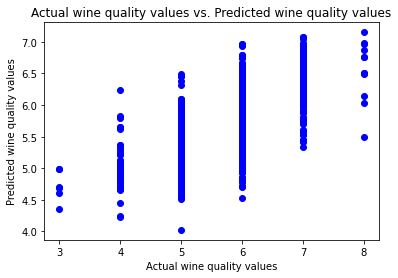

In [107]:
import matplotlib.pyplot as plt
y_pred=model.predict(X)

plt.scatter(y, y_pred,color='blue')
plt.title('Actual wine quality values vs. Predicted wine quality values')
plt.xlabel('Actual wine quality values')
plt.ylabel('Predicted wine quality values')
plt.show()


Caluclate the R-square to assess the goodness of fit of the regression model with neural network.

R-square improves as well. The previous R-square was 0.6224. 

### Analysis of the outlier wines: Are there any exceptionally good red wines in the pack of 1,599? 

Now, let's examine the outlier wines and see if we can pick out the exceptionally good red wines.

In [112]:
df=pd.concat([df,outlier_label], axis=1, sort=False)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,outlier_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [113]:
df=df.loc[df["outlier_label"] == -1]
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,outlier_label
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5,-1
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5,-1
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5,-1
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,-1
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5,-1
1477,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.6,7,-1
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5,-1
1570,6.4,0.360,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4,6,-1


Let's see if there is any exceptionally good red wines among the outlier wines. The exceptionally good red wines in the dataset have quality score of 8.

In [114]:
df_8=df.drop(["outlier_label"],axis=1)
exceptionally_good=df_8[df_8["quality"]==8]
exceptionally_good

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
1090,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8


In [120]:
df_3=df.drop(["outlier_label"],axis=1)
especially_poor=df_3[df_3["quality"]==3]
especially_poor

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3


In [115]:
print("There are ",len(exceptionally_good)," botttles of exceptionally good wines.") 

There are  6  botttles of exceptionally good wines.


In [121]:
print("There are ",len(especially_poor)," botttles of especially poor wines.") 

There are  4  botttles of especially poor wines.


Here we are. We picked the elites out from a crowd of 1,5999. 6 out of 1599. That is less than 0.4%. We also picked the extreme underachievers out from this crowd as well. There are 4 of them. That is less than 3%. Most of the time, the wines we see at the stores are neither exceptionally good or especially poor. They are of medium quality. It is very rare that we see exceptionally good or especially poor wines. 